In [1]:
import os

import librosa
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
data = pd.read_csv("../Data/features_3_sec.csv")
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [3]:
data.columns

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

In [4]:
data.drop(columns=["filename", "length"], inplace=True)

In [5]:
# sample data
audio = "../Data/genres_original/blues/blues.00000.wav"
sample, sr = librosa.load(audio)

In [6]:
print("Sample Rate (KHz):", sr, "\n")

Sample Rate (KHz): 22050 



## Waveform Analysis


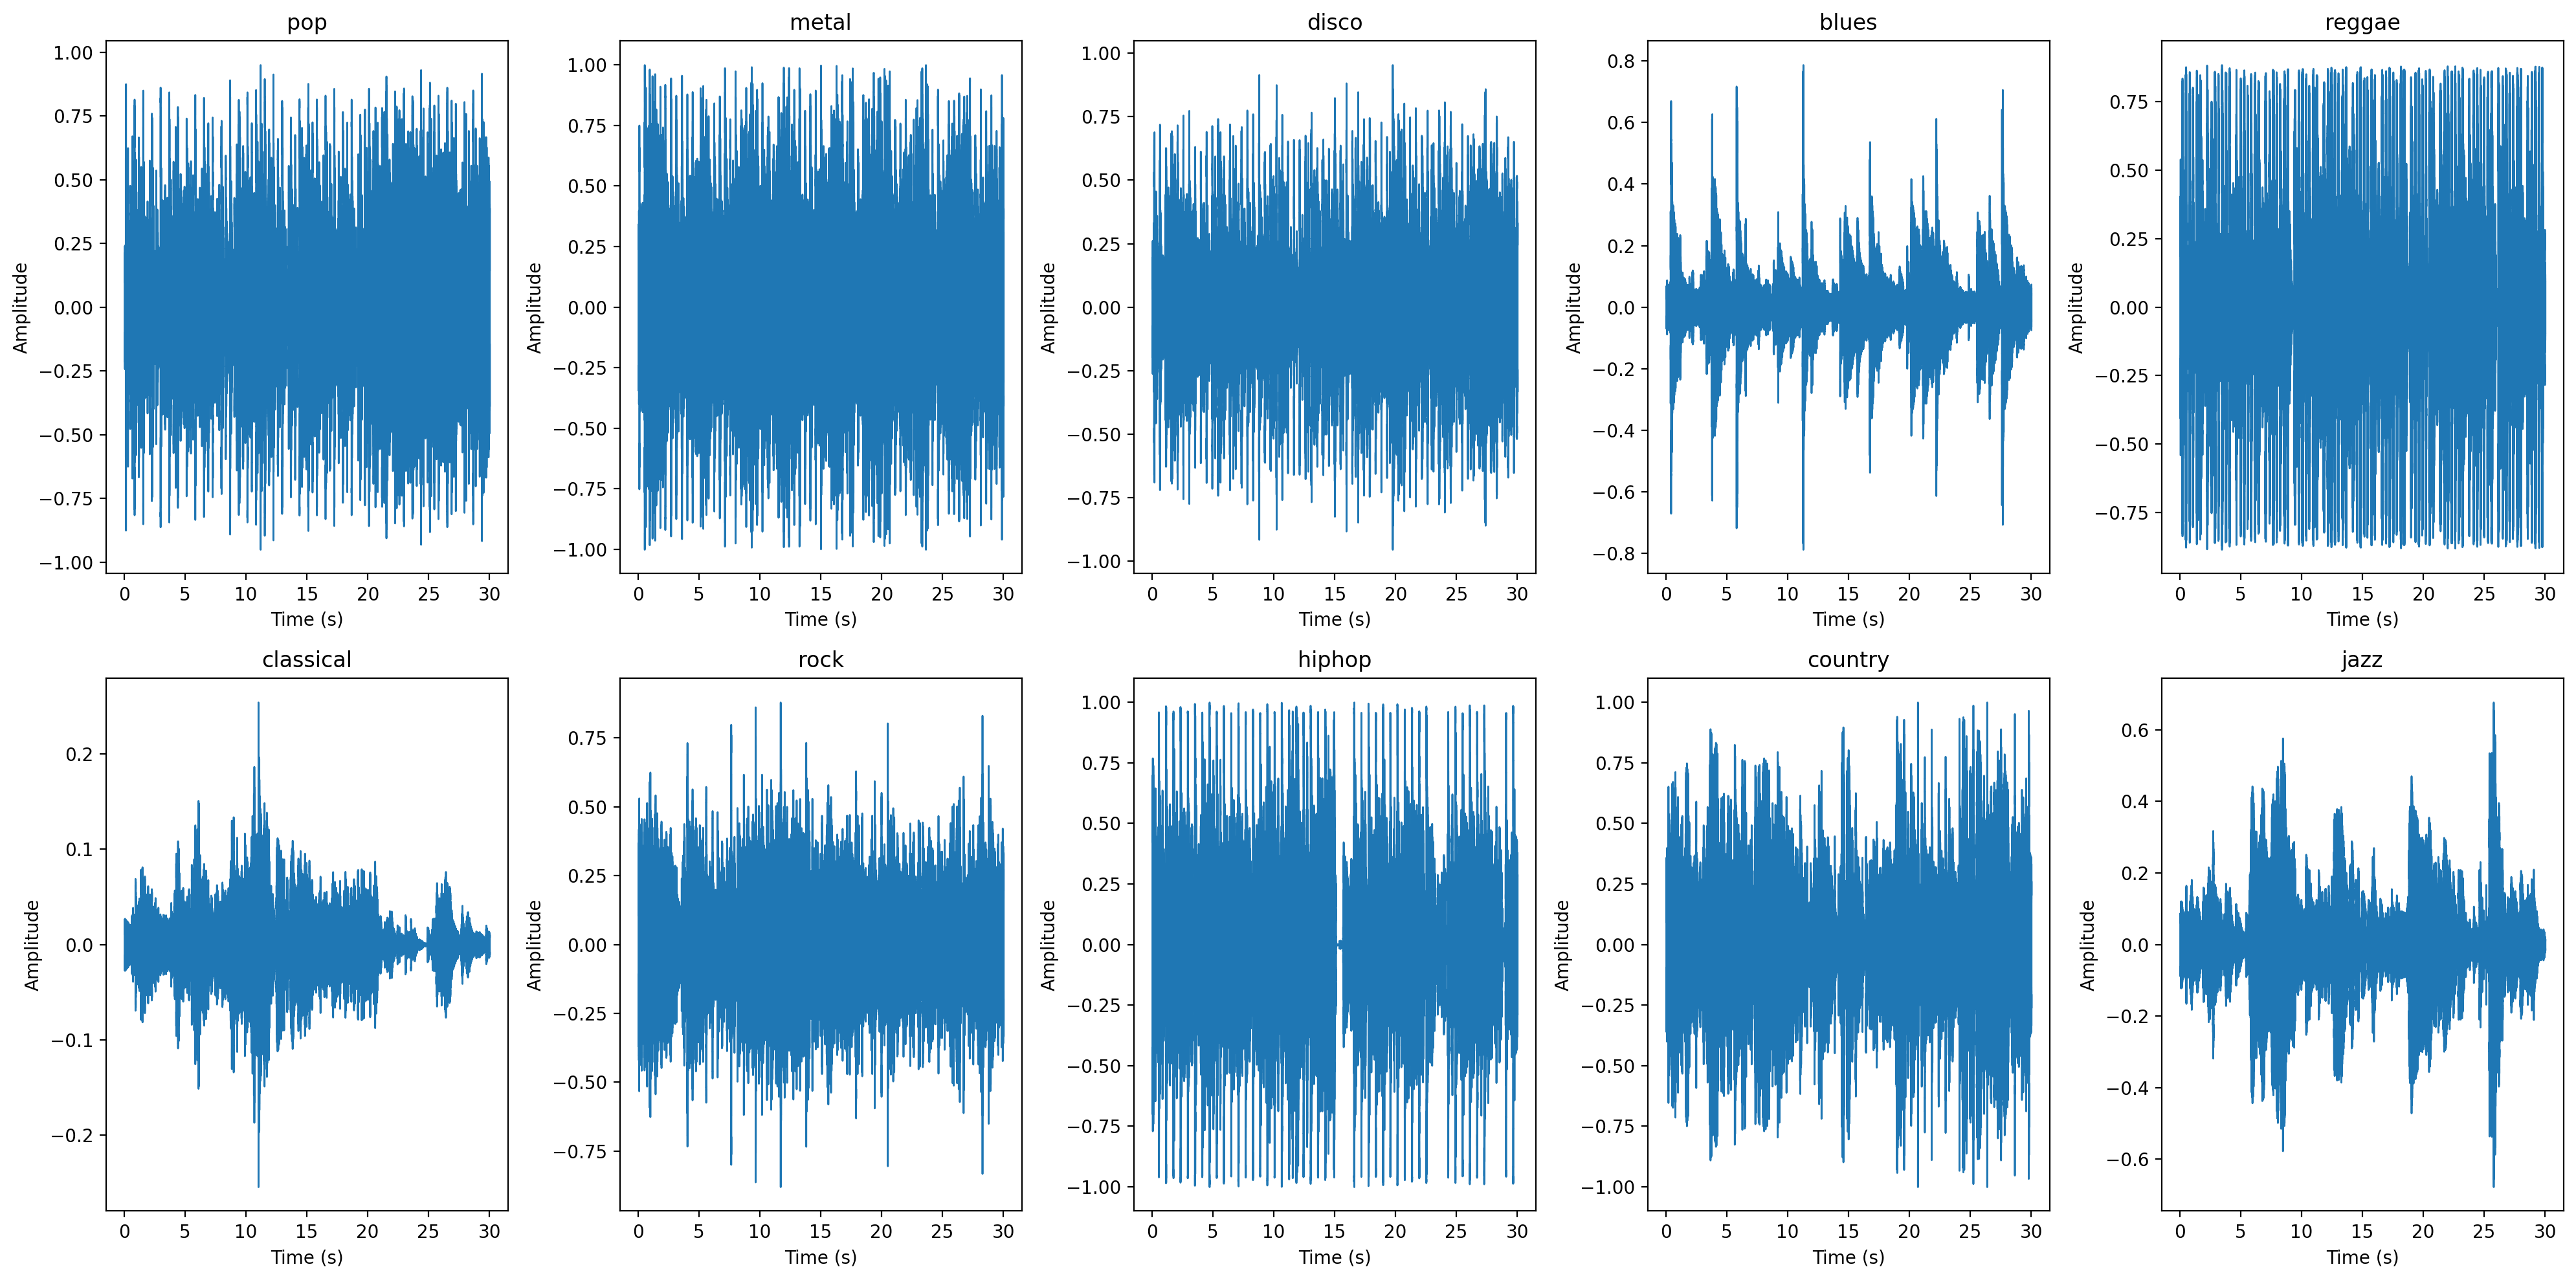

In [7]:
dataset_path = "../Data/genres_original"
genres = os.listdir(dataset_path)

fig, axs = plt.subplots(2, 5, figsize=(20, 10))
axs = axs.flatten()
# Plot waveforms
for i, genre in enumerate(genres):
    genre_path = os.path.join(dataset_path, genre)
    file_path = os.path.join(genre_path, os.listdir(genre_path)[0])
    y, sr = librosa.load(file_path)

    librosa.display.waveshow(y, sr=sr, ax=axs[i])
    axs[i].set_title(genre)
    axs[i].set_xlabel("Time (s)")
    axs[i].set_ylabel("Amplitude")

for i in range(len(genres), 10):
    axs[i].axis("off")

plt.tight_layout()
plt.show()
fig.savefig("../report/graphics/waveform.pdf", dpi=300)

## Chroma Analysis


Genre: pop
  File: pop.00027.wav
  Chroma shape: (12, 1293)
  Mean of Chroma: [0.30023655 0.37925783 0.47032177 0.3255314  0.34278485 0.3140671
 0.44267544 0.4012275  0.33955896 0.4199552  0.37288937 0.42283675]
  Standard deviation of Chroma: [0.22893561 0.266354   0.33189067 0.24816526 0.32064024 0.24787766
 0.31777486 0.31366283 0.24876907 0.29847908 0.27426782 0.33262712]
  Min/Max of Chroma: 0.0015211125137284398/1.0
----------------------------------------
Genre: metal
  File: metal.00022.wav
  Chroma shape: (12, 1293)
  Mean of Chroma: [0.25886324 0.3917812  0.31780684 0.39597642 0.61018807 0.31889504
 0.2497316  0.25602144 0.43996412 0.6745212  0.30705586 0.21916594]
  Standard deviation of Chroma: [0.191226   0.3088255  0.26173854 0.24883826 0.32076007 0.19723637
 0.23762955 0.17955483 0.24904484 0.3259513  0.16779256 0.19270769]
  Min/Max of Chroma: 0.006104012951254845/1.0
----------------------------------------
Genre: disco
  File: disco.00052.wav
  Chroma shape: (12, 1293

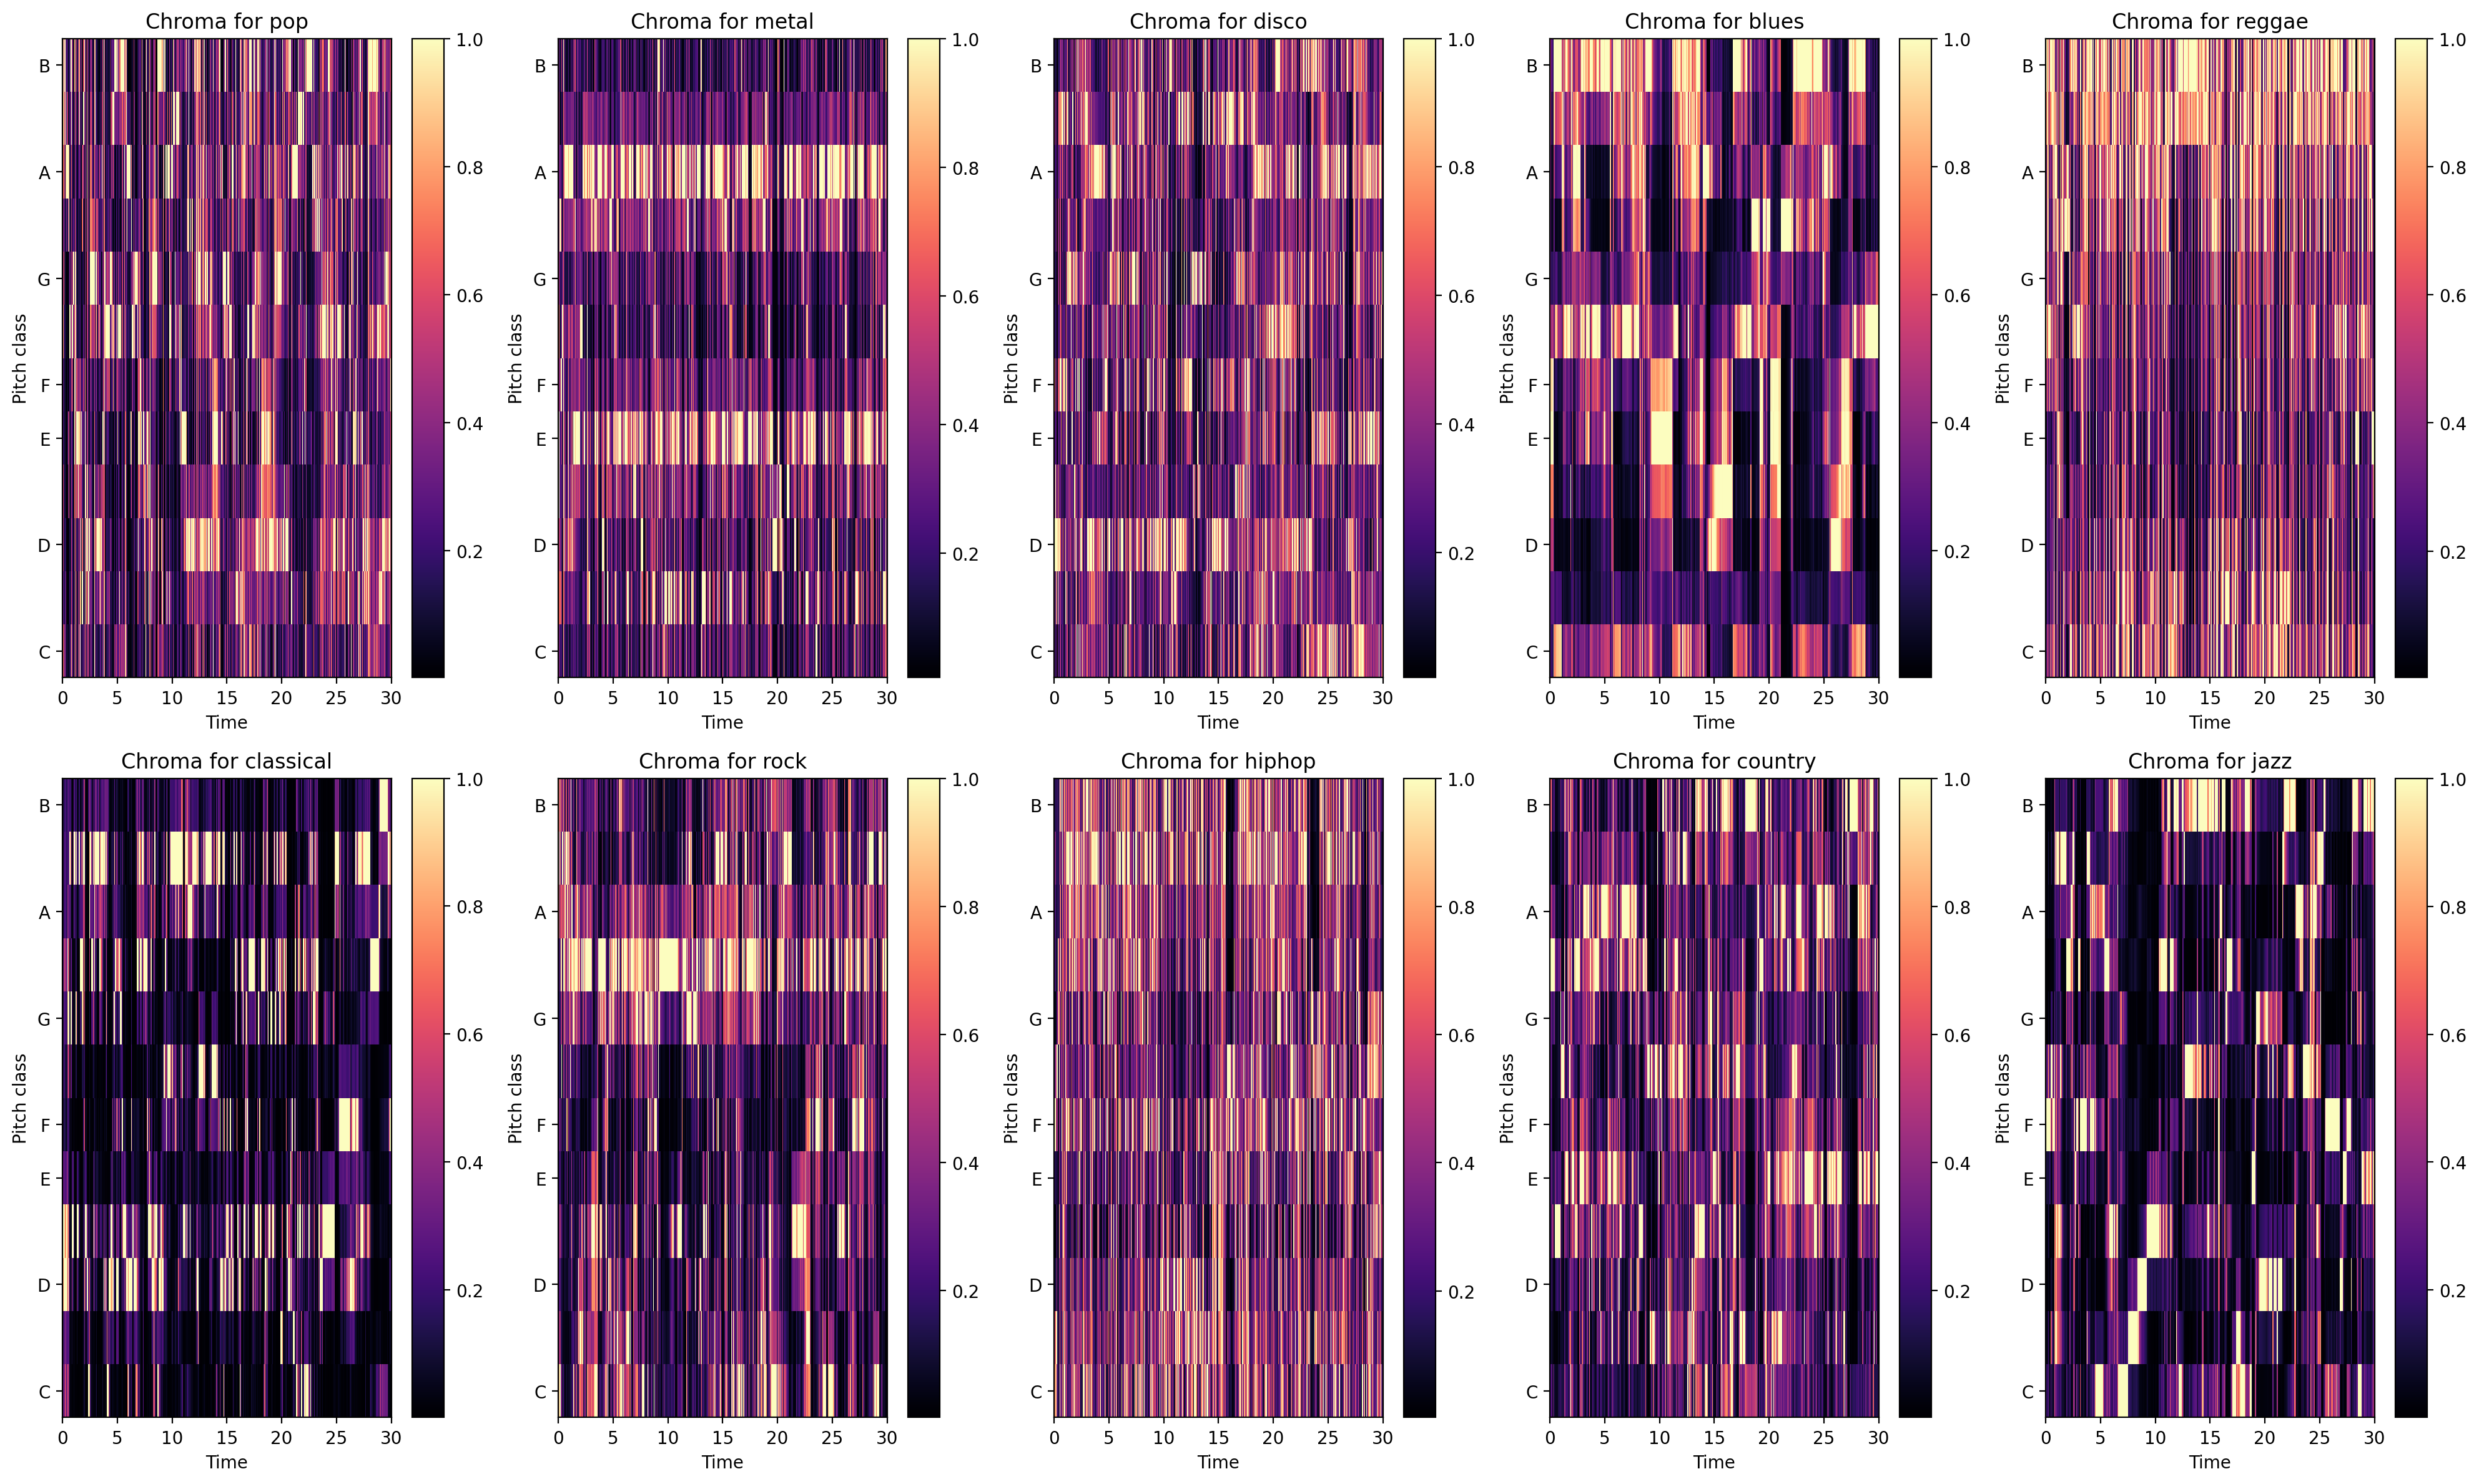

In [8]:
fig, axs = plt.subplots(2, 5, figsize=(20, 12))
axs = axs.flatten()

# Plot Chroma
for i, genre in enumerate(genres):
    genre_path = os.path.join(dataset_path, genre)
    file_path = os.path.join(genre_path, os.listdir(genre_path)[0])
    y, sr = librosa.load(file_path)

    chroma = librosa.feature.chroma_stft(y=y, sr=sr)

    librosa.display.specshow(chroma, y_axis="chroma", x_axis="time", ax=axs[i])
    plt.colorbar(axs[i].collections[0], ax=axs[i])
    axs[i].set_title(f"Chroma for {genre}")

    print(f"Genre: {genre}")
    print(f"  File: {os.path.basename(file_path)}")
    print(f"  Chroma shape: {chroma.shape}")
    print(f"  Mean of Chroma: {np.mean(chroma, axis=1)}")
    print(f"  Standard deviation of Chroma: {np.std(chroma, axis=1)}")
    print(f"  Min/Max of Chroma: {np.min(chroma)}/{np.max(chroma)}")
    print("-" * 40)

for i in range(len(genres), 10):
    axs[i].axis("off")

plt.tight_layout()
plt.show()
fig.savefig("../report/graphics/chroma.pdf", dpi=300)

## MFCC Analysis


Genre: pop
  File: pop.00027.wav
  Audio length: 30.00 seconds
  Sampling rate: 22050 Hz
  MFCCs shape: (13, 1293)
  Mean of MFCCs: [-75.35941    83.35071    10.695162   14.4605     14.239104    7.397378
   5.2808986  -0.393232    5.7210793   3.3658254  -2.5226784  -4.2161746
  -1.8445051]
  Standard deviation of MFCCs: [68.2279    28.659767  18.703611  14.750466  12.039239  11.47845
 10.521744   9.926886   9.998407   8.403234   7.8683295  8.072605
  7.7485538]
  Min/Max of MFCCs: -268.8353271484375/165.64651489257812
----------------------------------------
Genre: metal
  File: metal.00022.wav
  Audio length: 30.00 seconds
  Sampling rate: 22050 Hz
  MFCCs shape: (13, 1293)
  Mean of MFCCs: [-45.855606 107.999084 -11.737645  66.32688  -30.20683    9.242658
 -25.778023  21.871576 -17.935884  10.272776 -14.112474  18.74616
 -14.23165 ]
  Standard deviation of MFCCs: [30.282906  12.589462  11.864676   8.901269   8.056507  10.522009
  7.005419   6.9240174  5.6901083  6.6300707  6.179669  

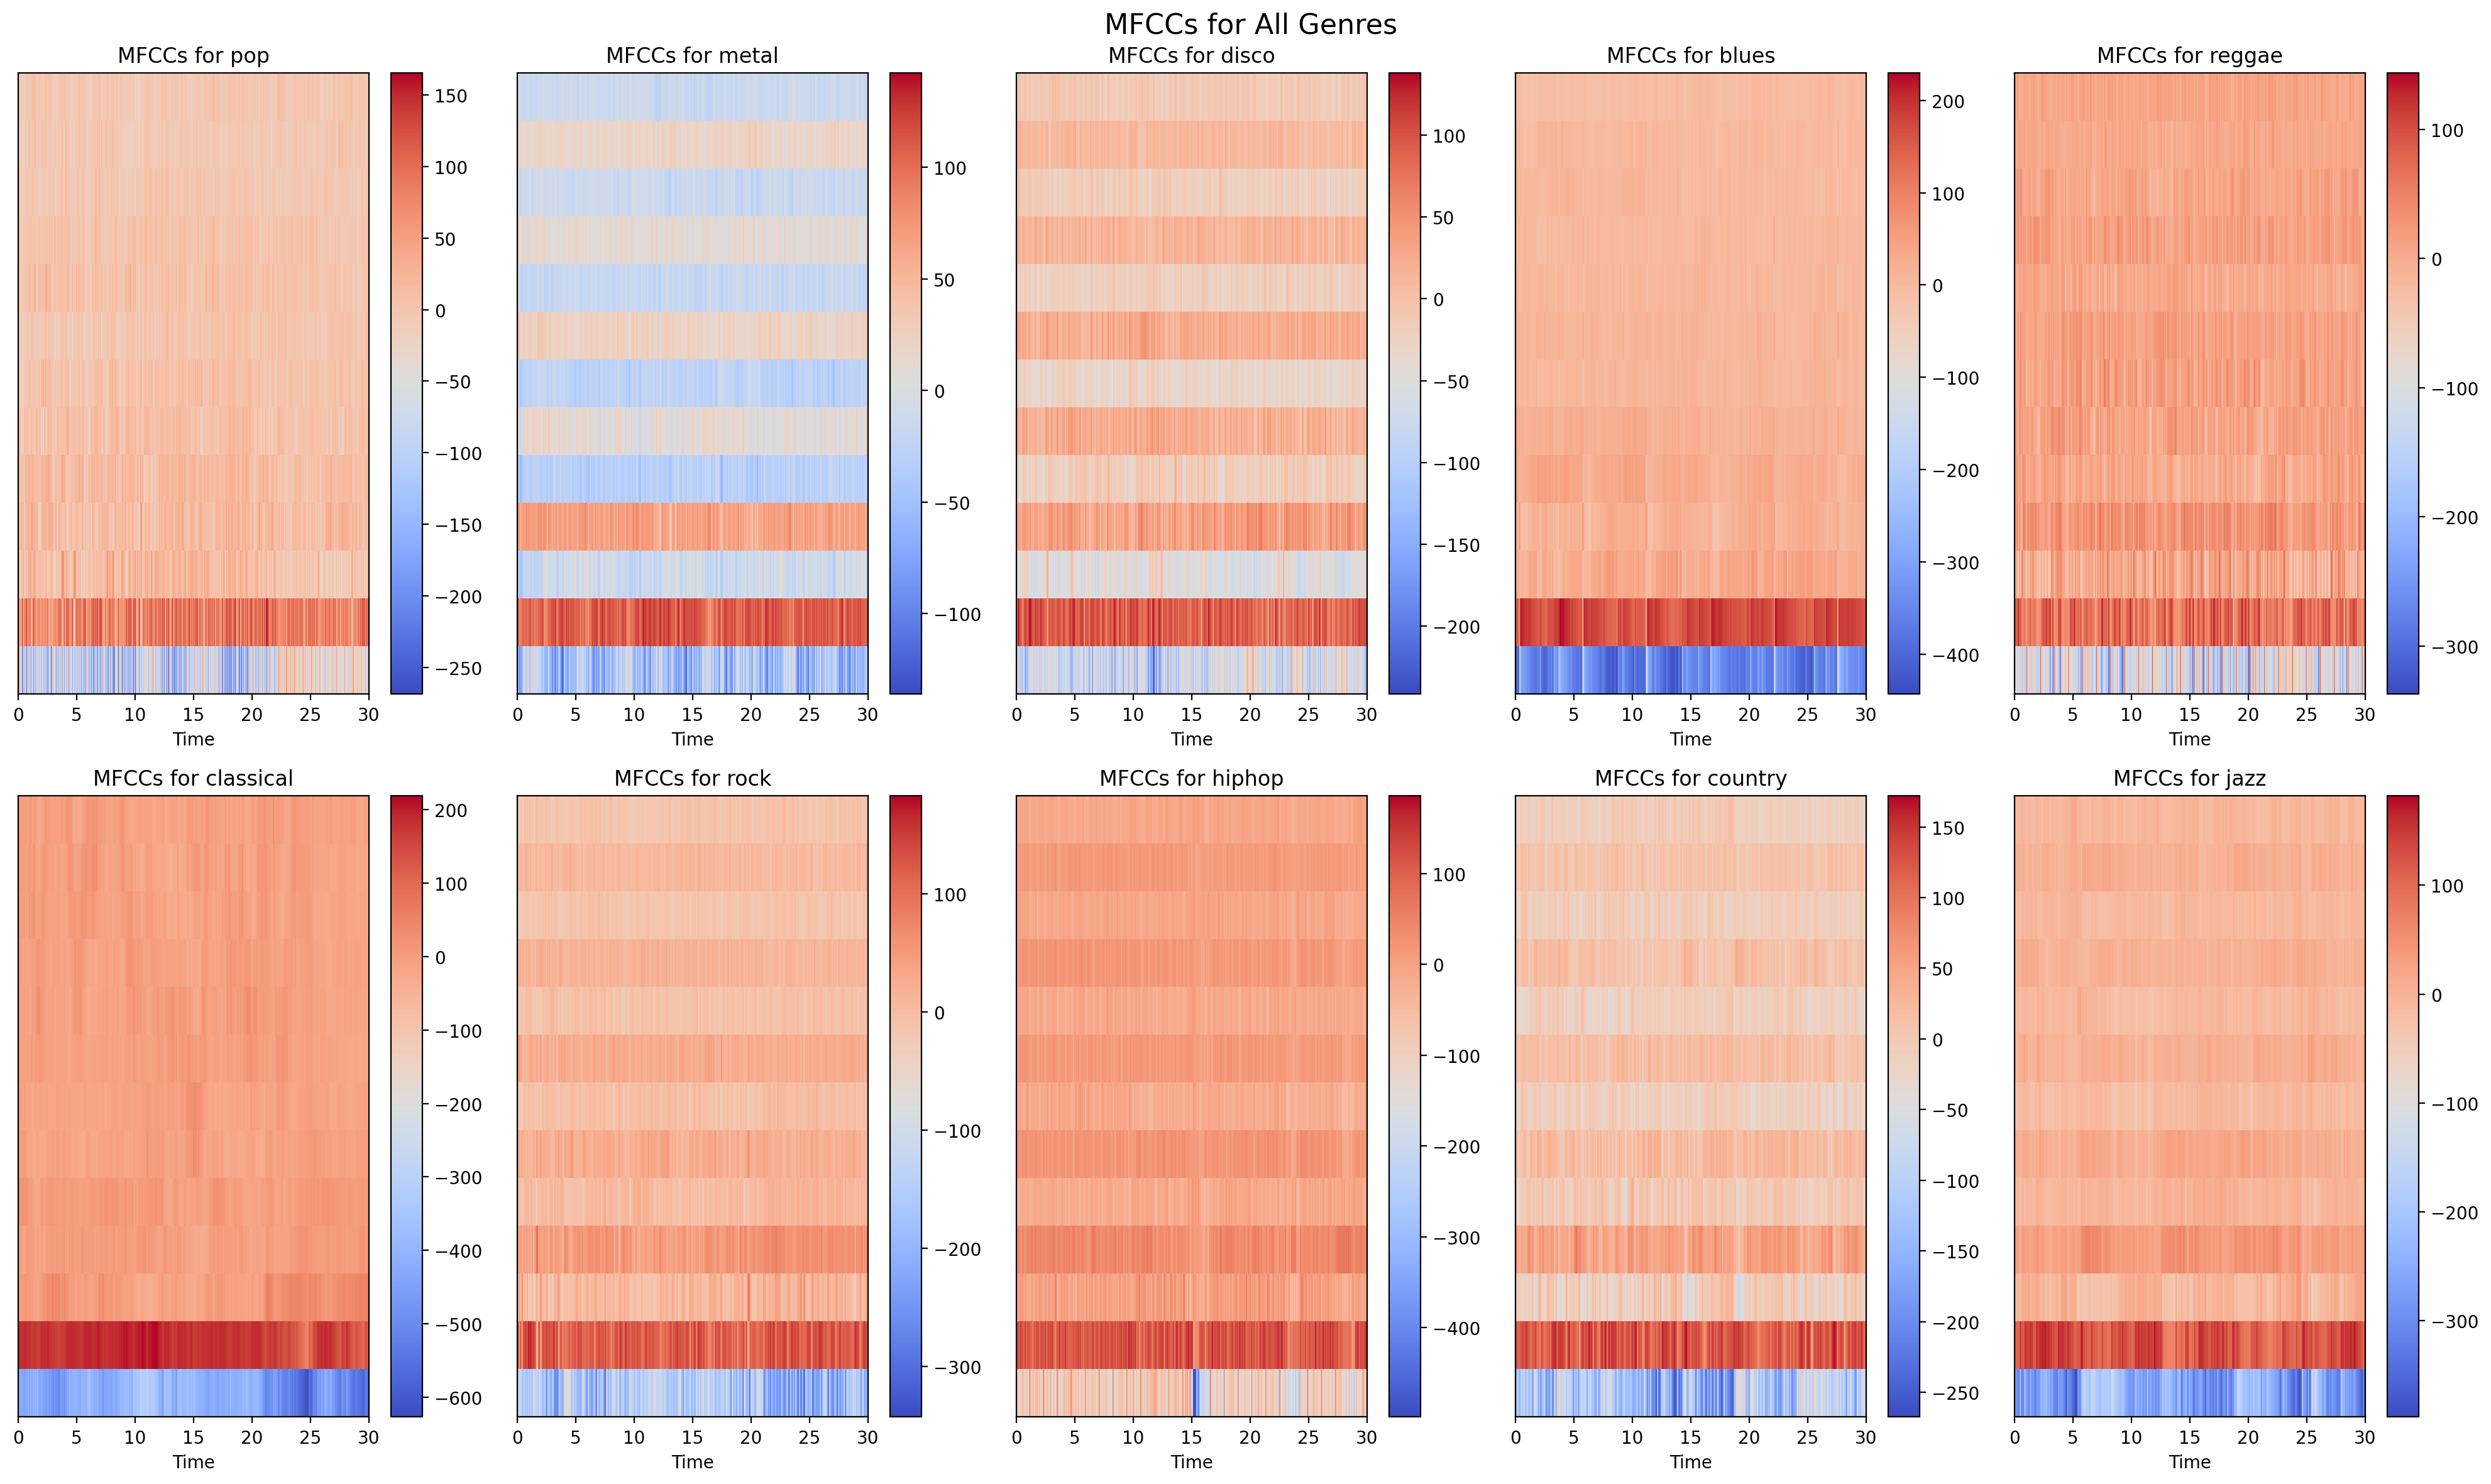

In [9]:
fig, axs = plt.subplots(2, 5, figsize=(20, 12))
fig.suptitle("MFCCs for All Genres", fontsize=16)

axs = axs.flatten()

# Plot MFCCs
for i, genre in enumerate(genres):
    genre_path = os.path.join(dataset_path, genre)
    file_path = os.path.join(genre_path, os.listdir(genre_path)[0])
    y, sr = librosa.load(file_path)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    librosa.display.specshow(mfccs, x_axis="time", ax=axs[i])
    plt.colorbar(axs[i].collections[0], ax=axs[i])
    axs[i].set_title(f"MFCCs for {genre}")

    print(f"Genre: {genre}")
    print(f"  File: {os.listdir(genre_path)[0]}")
    print(f"  Audio length: {len(y) / sr:.2f} seconds")
    print(f"  Sampling rate: {sr} Hz")
    print(f"  MFCCs shape: {mfccs.shape}")
    print(f"  Mean of MFCCs: {np.mean(mfccs, axis=1)}")
    print(f"  Standard deviation of MFCCs: {np.std(mfccs, axis=1)}")
    print(f"  Min/Max of MFCCs: {np.min(mfccs)}/{np.max(mfccs)}")
    print("-" * 40)

plt.tight_layout()
plt.show()
fig.savefig("../report/graphics/mfccs.pdf", dpi=300)

## Principal Component Analysis


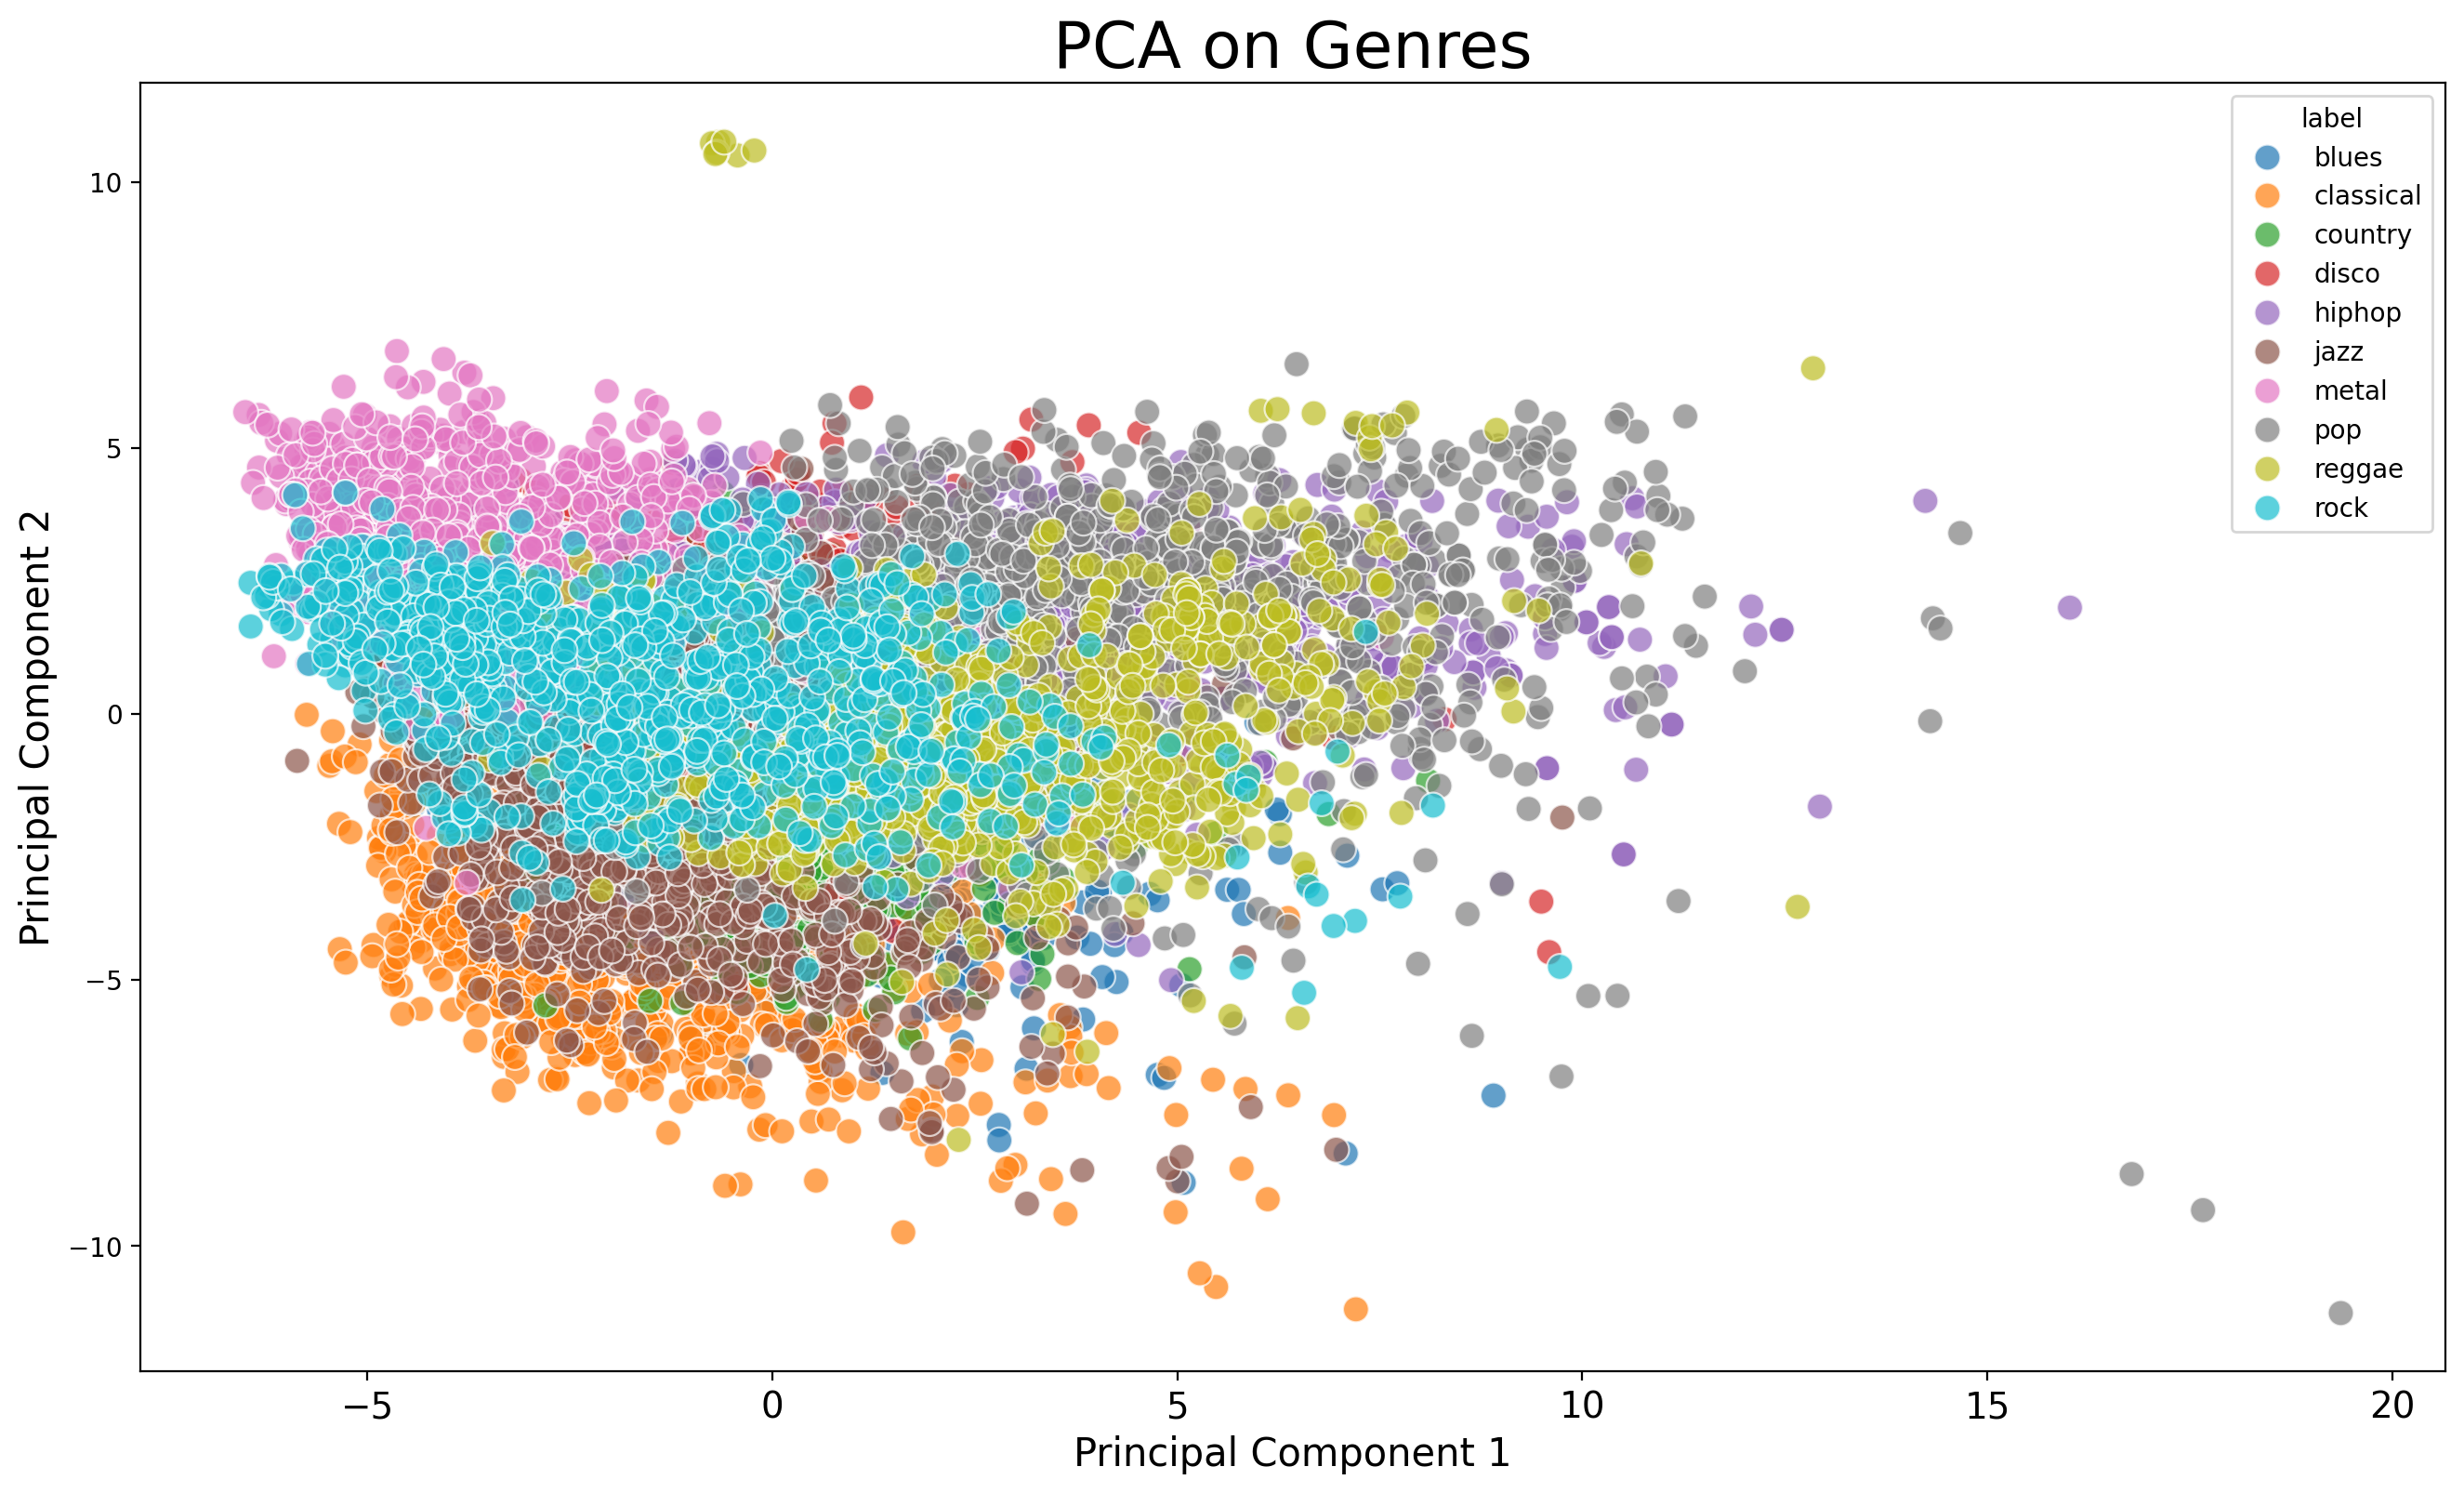

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separate features and labels
X = data.drop(columns=["label"])
y = data["label"]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Map labels to numerical codes for coloring
labels, uniques = pd.factorize(y)

plt.figure(figsize=(16, 9))
sns.scatterplot(
    x="principal component 1",
    y="principal component 2",
    data=pd.DataFrame(
        data=pca_result, columns=["principal component 1", "principal component 2"]
    ).assign(label=y),
    hue="label",
    alpha=0.7,
    s=100,
)

plt.title("PCA on Genres", fontsize=25)
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
plt.xlabel("Principal Component 1", fontsize=15)
plt.ylabel("Principal Component 2", fontsize=15)
plt.savefig("../report/graphics/pca.pdf", dpi=300)
plt.show()